In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,  font_manager
import matplotlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statistics
matplotlib.rcParams['axes.unicode_minus'] = False
fontname = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)

In [18]:
year_df = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index_col=None)
get_data = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 월별 총거래(정제2).csv', index_col=None)

In [19]:
get_data['Date'] = pd.to_datetime(get_data['Date'])

In [20]:
years = get_data['Date'].dt.year.unique()

In [21]:

# year_mean = []
# year_addon = []
# for i in years:
#     for j in get_data.columns:
#         if '평균' in j:
#             print(get_data.loc[get_data['Date'].dt.year == i,'%s' %j][:5])
#             data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
#             year_addon.append(data_p.sum())
#             # np_std= np.std(get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values)
#             # print('표준편차: ',np_std)
#             # year_addon.append(np_std)
#         elif j != 'Date':
#             data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
#             year_addon.append(data_p.sum())
#         else:
#             year_addon.append(i)
#     year_mean.append(year_addon)
#     year_addon = []

# year_mean

In [32]:
year_df['전국 평균단가'] = (year_df['서울 총거래금액'] + year_df['부산 총거래금액'] + year_df['대구 총거래금액'] + year_df['대전 총거래금액'] + year_df['광주 총거래금액']) / (year_df['서울 총거래물량'] + year_df['부산 총거래물량'] + year_df['대구 총거래물량'] + year_df['대전 총거래물량'] + year_df['광주 총거래물량']) 

In [34]:
year_df.to_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index=False, encoding='UTF-8')

In [22]:
# year_df = pd.DataFrame(year_mean, columns=['year', '서울 총거래물량', '서울 총거래금액', '서울 평균단가','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대전 총거래물량', '대전 총거래금액', '대전 평균단가', '광주 총거래물량', '광주 총거래금액', '광주 평균단가'])

In [23]:
# for i in years:
#     year_df.loc[year_df['year']== i,'서울 평균단가'] = year_df['서울 총거래금액']/year_df['서울 총거래물량']
#     year_df.loc[year_df['year']== i,'부산 평균단가'] = year_df['부산 총거래금액']/year_df['부산 총거래물량']
#     year_df.loc[year_df['year']== i,'대구 평균단가'] = year_df['대구 총거래금액']/year_df['대구 총거래물량']
#     year_df.loc[year_df['year']== i,'대전 평균단가'] = year_df['대전 총거래금액']/year_df['대전 총거래물량']
#     year_df.loc[year_df['year']== i,'광주 평균단가'] = year_df['광주 총거래금액']/year_df['광주 총거래물량']

# year_df

In [24]:
# get_data = get_data.rename(columns={'서울 평균거래금액':'서울 평균단가', '부산 평균거래금액':'부산 평균단가', '대구 평균거래금액':'대구 평균단가', '대전 평균거래금액':'대전 평균단가', '광주 평균거래금액':'광주 평균단가'})

In [92]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            seoul_data = year_df.loc[year_df['year']==i, '서울 평균단가'].values
            seoul_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '서울 평균단가'].values
            seoul_grade = seoul_data - seoul_data1

            busan_data = year_df.loc[year_df['year']==i, '부산 평균단가'].values
            busan_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '부산 평균단가'].values
            busan_grade = busan_data - busan_data1

            daegu_data = year_df.loc[year_df['year']==i, '대구 평균단가'].values
            daegu_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '대구 평균단가'].values
            daegu_grade = daegu_data - daegu_data1

            daejeon_data = year_df.loc[year_df['year']==i, '대전 평균단가'].values
            daejeon_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            daejeon_grade = daejeon_data - daejeon_data1

            gwangju_data = year_df.loc[year_df['year']==i, '광주 평균단가'].values
            gwangju_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            gwangju_grade = gwangju_data - gwangju_data1
            print(len(gwangju_grade))
            grade_data.append([g_date,seoul_grade[0], busan_grade[0], daegu_grade[0], daejeon_grade[0], gwangju_grade[0]])
print(grade_data)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[['2020-1', -1543.7628719800684, -1449.4078789887767, -860.657016033631, -1536.2116400766465, -1391.1655210332237], ['2020-2', -1325.2107806567126, -1210.8963394360962, -743.6218604199735, -1286.961088681787, -1141.9149696383643], ['2020-3', -608.0819795294121, -564.2717585716118, -330.6833129627403, -666.6892693942966, -521.6431503508738], ['2020-4', 594.57708638132, 599.5022303652574, 465.59097381061474, 461.39614300081826, 606.442262044241], ['2020-5', 696.6197304319053, 881.2033343662674, 529.4030222304609, 667.9208001199684, 812.9669191633911], ['2020-6', 719.9190783146241, 752.4528601292559, 527.0861241163798, 549.7629022478434, 694.8090212912662], ['2020-7', 396.47414028581557, 433.258184705207, 394.81725113069933, 277.894226943974, 422.94034598739677], ['2020-8', -991.23250634705, -986.4021750465704, -853.5010940461207, -1134.0630180942542, -989.0168990508314], ['2020-9', -1058.6984322877595

In [93]:
mean_data = pd.DataFrame(grade_data, columns=['Date','서울 평균단가 편차', '부산 평균단가 편차', '대구 평균단가 편차', '대전 평균단가 편차', '광주 평균단가 편차'])

In [94]:
mean_data['Date'] = pd.to_datetime(mean_data['Date'])

In [95]:
mean_all = pd.merge(get_data, mean_data, on='Date', how='inner')

In [96]:
mean_all = mean_all[['Date', '서울 총거래물량', '서울 총거래금액', '서울 평균단가', '서울 평균단가 편차','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '부산 평균단가 편차', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대구 평균단가 편차','대전 총거래물량', '대전 총거래금액', '대전 평균단가', '대전 평균단가 편차', '광주 총거래물량', '광주 총거래금액', '광주 평균단가', '광주 평균단가 편차']]

In [91]:
mean_all

Date    서울 총거래물량     서울 총거래금액      서울 평균단가   서울 평균단가 편차  부산 총거래물량  \
0  2020-01-01  2780377.65   9830108400  3535.529931 -1583.537446  314022.5   
1  2020-02-01  2720669.88   9024401700  3316.977839 -1364.985354  331341.0   
2  2020-03-01  3739541.28   9722242800  2599.849038  -647.856553  435282.4   
3  2020-04-01  5703989.95   7969557560  1397.189972   554.802513  607195.5   
4  2020-05-01  5487463.43   7107073600  1295.147328   656.845157  644394.2   
5  2020-06-01  5435012.79   6912510040  1271.847980   680.144505  556802.2   
6  2020-07-01  4369081.64   6969965000  1595.292918   356.699566  517931.6   
7  2020-08-01  3399364.19  10140301900  2982.999565 -1031.007080  419775.4   
8  2020-09-01  4424172.16  13495784500  3050.465491 -1098.473006  425793.8   
9  2020-10-01  5212849.56   6208943600  1191.084363   760.908121  509824.0   
10 2020-11-01  4236717.58   6075622000  1434.039887   517.952598  464924.7   
11 2020-12-01  3592812.19   8326873300  2317.647809  -365.655324  432768.8   
12 2021-01-01  2515752.28   9552292700  3796.992564 -1745.137419  289478.7   
13 2021-02-01  2784898.80   9301821850  3340.093310 -1288.238165  338578.5   
14 2021-03-01  3687099.34   9773525250  2650.735537  -598.880392  455159.7   
15 2021-04-01  5199504.12   8397347080  1615.028450   436.826695  630508.1   
16 2021-05-01  4877778.40   8370913570  1716.132404   335.722741  590536.4   
17 2021-06-01  4793488.40   7282610250  1519.271487   532.583658  503662.0   
18 2021-07-01  4644589.35   4126580450   888.470463  1163.384682  753932.9   
19 2021-08-01  3756797.22   6405382590  1705.011534   346.843611  550469.7   
20 2021-09-01  4588209.55   9799784380  2135.862426   -84.007281  535294.5   
21 2021-10-01  3629822.45   8101611660  2231.958111  -180.102967  428466.3   
22 2021-11-01  3600907.58   8648078750  2401.638631  -349.783486  415082.8   
23 2021-12-01  2095295.27   6781030640  3236.312675 -1184.457530  262487.4   
24 2022-01-01  2826074.21  11059930100  3913.531379 -1720.696584  403176.8   
25 2022-02-01  2675632.47   7577148150  2831.909178  -639.074384  424483.4   
26 2022-03-01  3778510.27  10212341280  2702.742761  -509.907966  493467.1   
27 2022-04-01  5333956.87   8716659530  1634.182604   558.652190  685485.4   
28 2022-05-01  5463470.80   7274140350  1331.413787   861.421008  779789.9   
29 2022-06-01  4157530.70   7551977950  1816.457531   376.377264  573890.0   
30 2022-07-01  3881636.81   8484135865  2185.710895     7.123900  556571.1   
31 2022-08-01  3531789.62  11855329140  3356.748395 -1163.913601  453300.3   
32 2022-09-01  4373461.66  12098845400  2766.423108  -573.588314  500642.5   
33 2022-10-01  4230645.50   8675414400  2050.612466   142.222329  528108.3   
34 2022-11-01  4390622.58   6394509650  1456.401577   736.433218  581909.6   
35 2022-12-01  3148367.93   8430369900  2677.695265  -484.860471  403265.5   
36 2023-01-01  2547523.26   9917351050  3892.938371 -1486.454180  350412.7   
37 2023-02-01  2291128.46   9745524250  4253.591372 -1847.107182  327964.8   
38 2023-03-01  3499417.85  11626881000  3322.518630  -916.034439  506890.7   
39 2023-04-01  4256007.57   9463875000  2223.650885   182.833306  628393.0   
40 2023-05-01  5031917.64  10053772750  1998.000259   408.483931  735803.6   
41 2023-06-01  5310808.58   8540299650  1608.097811   798.386380  709416.0   
42 2023-07-01  4200366.52   7128554702  1697.126826   709.357364  589043.6   
43 2023-08-01  1069406.41   1912633300  1788.499940   617.984251  132387.0   

      부산 총거래금액      부산 평균단가   부산 평균단가 편차   대구 총거래물량  ...      대구 평균단가  \
0   1158346710  3688.737941 -1736.745456   810553.0  ...  2507.691045   
1   1143201466  3450.226401 -1498.233916   827334.0  ...  2390.655890   
2   1220358529  2803.601820  -851.609335   978456.0  ...  1977.717342   
3    995696080  1639.827831   312.164653  1427859.0  ...  1181.443056   
4    875168986  1358.126727   593.865757  1371680.0  ...  1117.631007   
5    827896497  1486.877202   465.115283  1417036.0  ...  11

In [67]:
area = '서울'
print(data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area])
print(data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area])

0    -1583.537446
1    -1364.985354
2     -647.856553
3      554.802513
4      656.845157
5      680.144505
6      356.699566
7    -1031.007080
8    -1098.473006
9      760.908121
10     517.952598
11    -365.655324
Name: 서울 평균단가 편차, dtype: float64
12   -1745.137419
13   -1288.238165
14    -598.880392
15     436.826695
16     335.722741
17     532.583658
18    1163.384682
19     346.843611
20     -84.007281
21    -180.102967
22    -349.783486
23   -1184.457530
Name: 서울 평균단가 편차, dtype: float64
24   -1720.696584
25    -639.074384
26    -509.907966
27     558.652190
28     861.421008
29     376.377264
30       7.123900
31   -1163.913601
32    -573.588314
33     142.222329
34     736.433218
35    -484.860471
Name: 서울 평균단가 편차, dtype: float64
36   -1486.454180
37   -1847.107182
38    -916.034439
39     182.833306
40     408.483931
41     798.386380
42     709.357364
43     617.984251
Name: 서울 평균단가 편차, dtype: float64


In [130]:
def pltdata(month, data, area):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area], color='Black')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2020년 %s 평균단가 편차' % area)

    plt.subplot(2,2,2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area], color='y')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2021년 %s 평균단가 편차' % area)

    plt.subplot(2,2,3)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area], color='r')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2022년 %s 평균단가 편차' % area)

    plt.subplot(2,2,4)
    plt.barh(range(1, 9), data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area], color='b')
    plt.ylabel('월')
    plt.yticks(range(1, 9), [f'{i}월' for i in range(1, 9)])
    plt.xlabel('%s 편차' %area)
    plt.title('2023년 %s 평균단가 편차' % area)

    plt.savefig('../data/각 년도 별 %s의 평균 단가 편차.png' %area)
    plt.show()

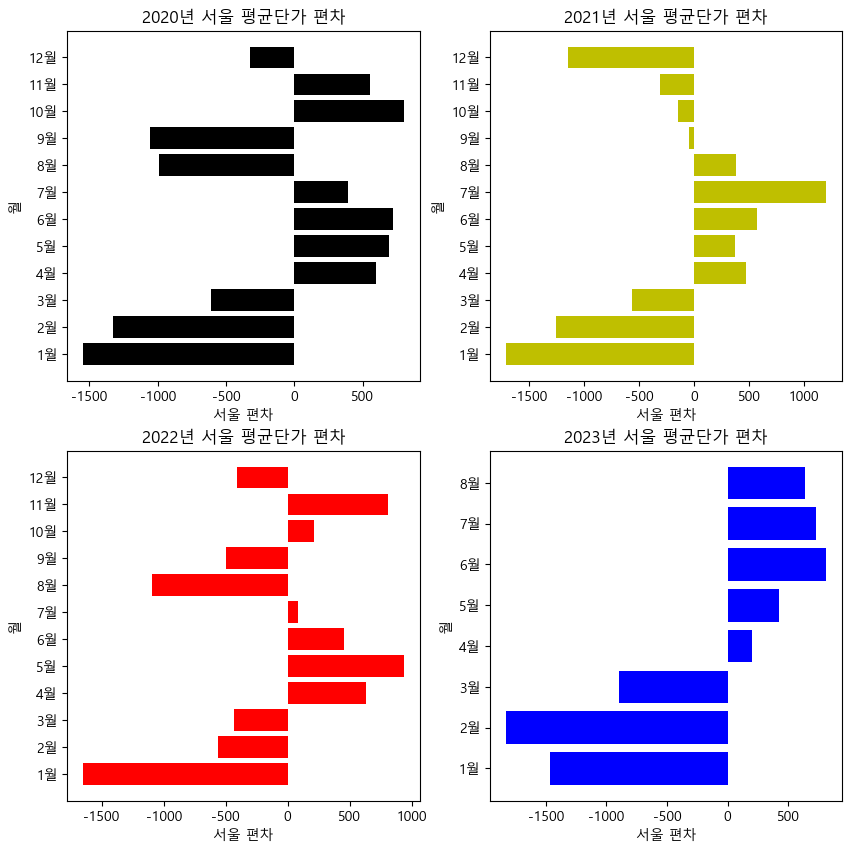

In [98]:
months = mean_all['Date'].dt.month.unique()
pltdata(months, mean_all, "서울")

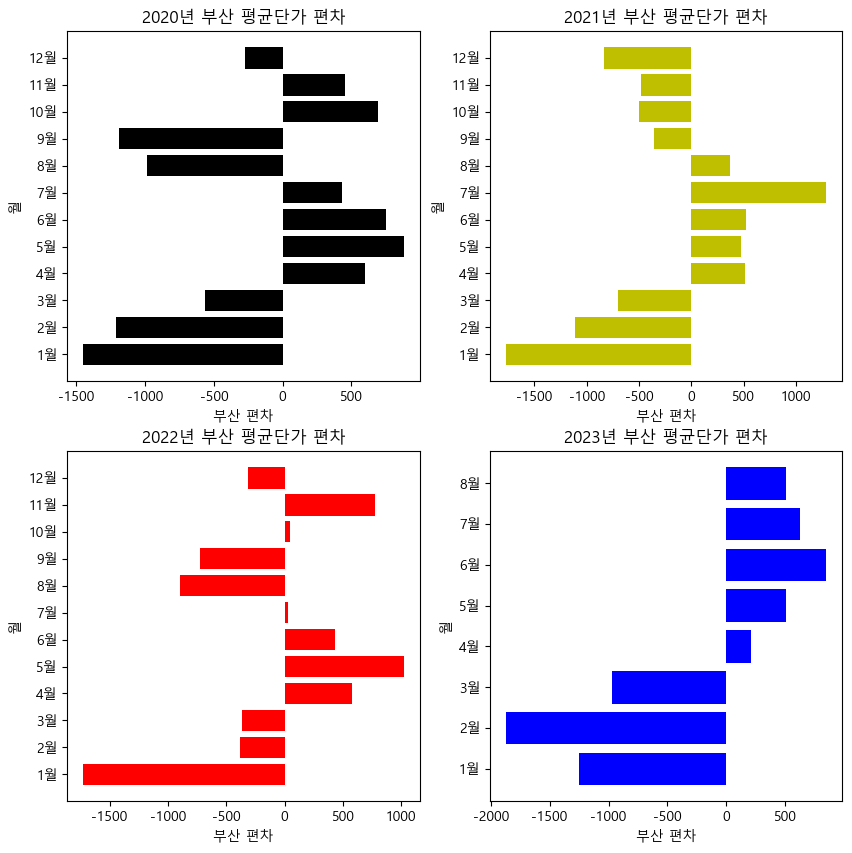

In [99]:
pltdata(months, mean_all, "부산")

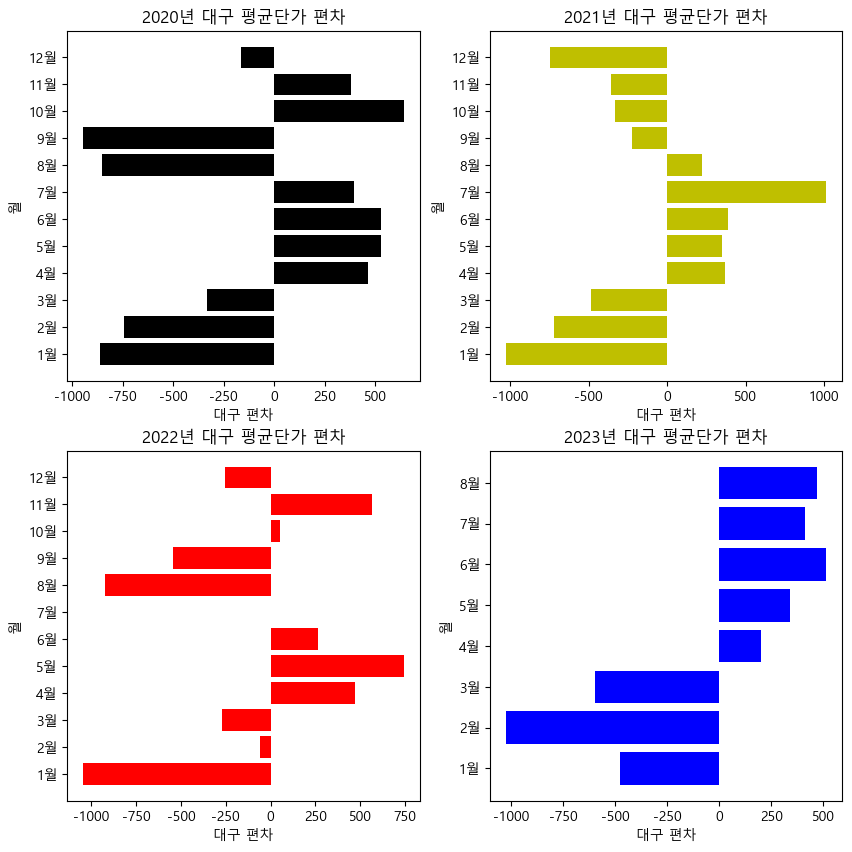

In [100]:
pltdata(months, mean_all, "대구")

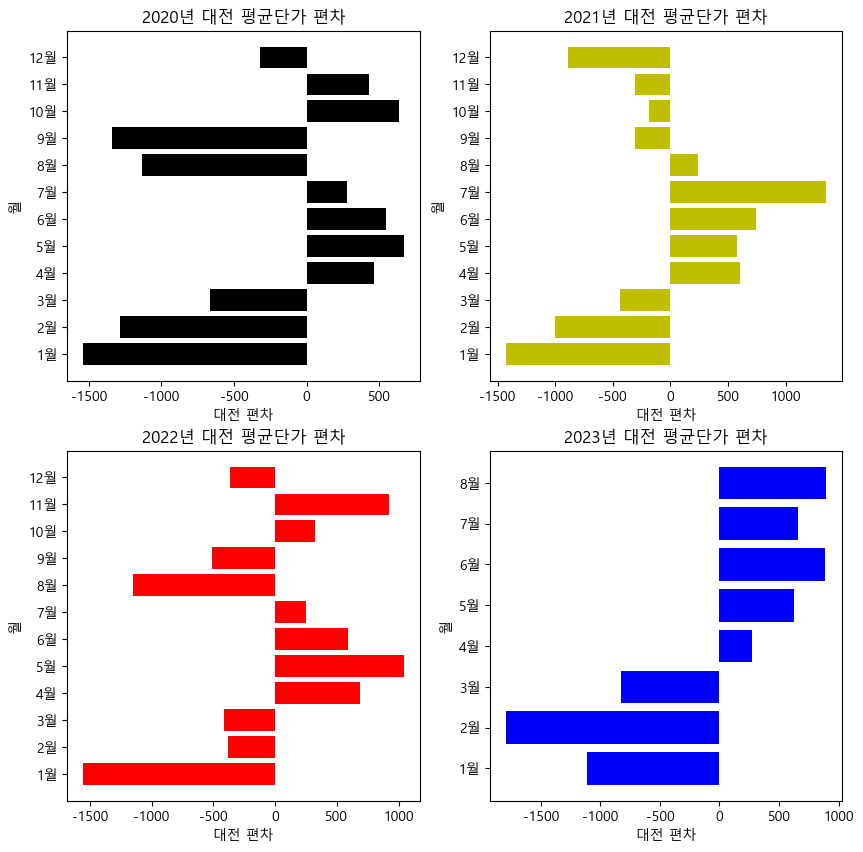

In [101]:
pltdata(months, mean_all, "대전")

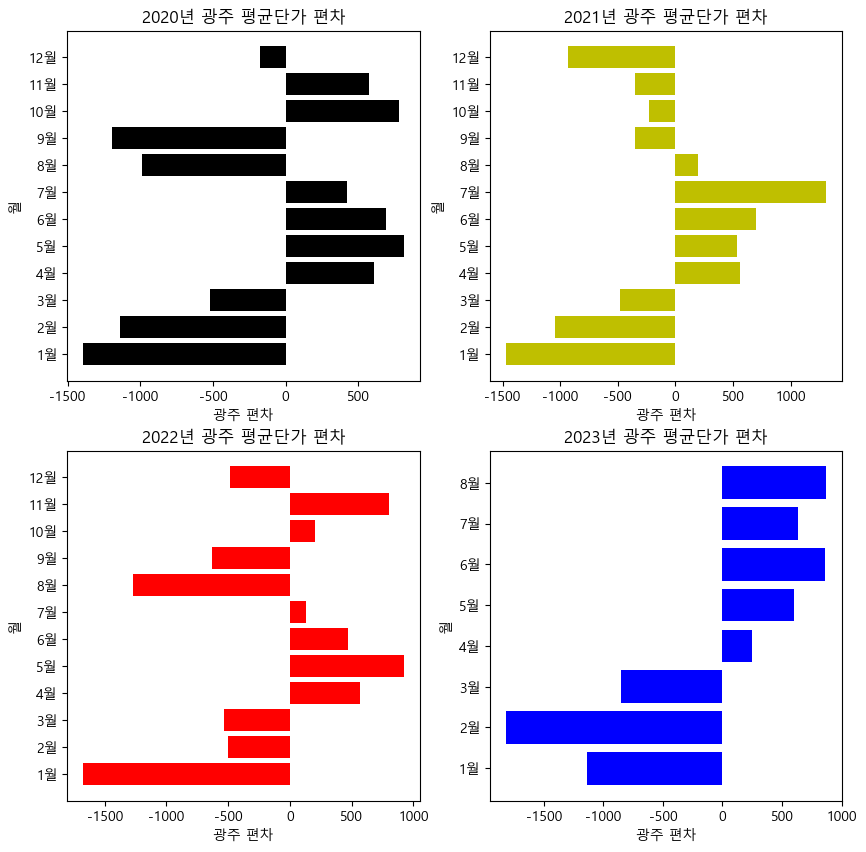

In [102]:
pltdata(months, mean_all, "광주")

In [105]:
get_data['전국 평균단가'] = (get_data['서울 총거래금액'] + get_data['부산 총거래금액'] + get_data['대구 총거래금액'] + get_data['대전 총거래금액'] + get_data['광주 총거래금액']) / (get_data['서울 총거래물량'] + get_data['부산 총거래물량'] + get_data['대구 총거래물량'] + get_data['대전 총거래물량'] + get_data['광주 총거래물량']) 

In [107]:
get_data.head()

Date    서울 총거래물량    서울 총거래금액      서울 평균단가  부산 총거래물량    부산 총거래금액  \
0 2020-01-01  2780377.65  9830108400  3535.529931  314022.5  1158346710   
1 2020-02-01  2720669.88  9024401700  3316.977839  331341.0  1143201466   
2 2020-03-01  3739541.28  9722242800  2599.849038  435282.4  1220358529   
3 2020-04-01  5703989.95  7969557560  1397.189972  607195.5   995696080   
4 2020-05-01  5487463.43  7107073600  1295.147328  644394.2   875168986   

       부산 평균단가   대구 총거래물량    대구 총거래금액      대구 평균단가  대전 총거래물량    대전 총거래금액  \
0  3688.737941   810553.0  2032616500  2507.691045  430426.0  1337955110   
1  3450.226401   827334.0  1977870900  2390.655890  406261.0  1228049490   
2  2803.601820   978456.0  1935109400  1977.717342  520843.0  1246237300   
3  1639.827831  1427859.0  1686934100  1181.443056  615618.0   884077957   
4  1358.126727  1371680.0  1533032100  1117.631007  631163.0   818889984   

       대전 평균단가  광주 총거래물량    광주 총거래금액      광주 평균단가      전국 평균단가  
0  3108.443983  478129.0  1644281360  3438.991067  3324.666248  
1  3022.809204  451781.0  1441064160  3189.740516  3127.164424  
2  2392.731207  587348.0  1509172300  2569.468697  2496.717006  
3  1436.082046  800667.0  1154068030  1441.383284  1386.114372  
4  1297.430274  759615.0   938017136  1234.858627  1267.346727

In [109]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
all_grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            total_data = year_df.loc[year_df['year']==i, '전국 평균단가'].values
            total_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '전국 평균단가'].values
            total_grade = total_data - total_data1

            all_grade_data.append([g_date,total_grade[0]])
print(all_grade_data)

[['2020-1', -1372.6737629937743], ['2020-2', -1175.171939607037], ['2020-3', -544.7245211032609], ['2020-4', 565.8781132858705], ['2020-5', 684.64575746071], ['2020-6', 693.3455775554819], ['2020-7', 409.4970073228094], ['2020-8', -950.600299396312], ['2020-9', -1036.5615568230924], ['2020-10', 765.6285753700913], ['2020-11', 511.0563856349779], ['2020-12', -272.5275730058379], ['2021-1', -1533.9131244154933], ['2021-2', -1094.5544814068453], ['2021-3', -548.2440373511299], ['2021-4', 468.24703055487976], ['2021-5', 396.7025621060691], ['2021-6', 554.8992293816395], ['2021-7', 1191.6749709683481], ['2021-8', 340.2475366069766], ['2021-9', -124.55052490598109], ['2021-10', -210.41202448836248], ['2021-11', -335.4279853787257], ['2021-12', -1005.8754079414216], ['2022-1', -1533.6236008737433], ['2022-2', -420.37497500251766], ['2022-3', -389.8466866325148], ['2022-4', 589.5557399828576], ['2022-5', 913.4551753061387], ['2022-6', 416.9073641720115], ['2022-7', 64.03933356797643], ['2022-8

In [122]:
total_df = pd.DataFrame(all_grade_data, columns=['Date', '전국 평균단가 편차'])

In [123]:
total_df['Date'] = pd.to_datetime(total_df['Date'])

In [124]:
total_all = pd.merge(get_data, total_df, on='Date', how='inner')

In [125]:
total_all.head()

Date    서울 총거래물량    서울 총거래금액      서울 평균단가  부산 총거래물량    부산 총거래금액  \
0 2020-01-01  2780377.65  9830108400  3535.529931  314022.5  1158346710   
1 2020-02-01  2720669.88  9024401700  3316.977839  331341.0  1143201466   
2 2020-03-01  3739541.28  9722242800  2599.849038  435282.4  1220358529   
3 2020-04-01  5703989.95  7969557560  1397.189972  607195.5   995696080   
4 2020-05-01  5487463.43  7107073600  1295.147328  644394.2   875168986   

       부산 평균단가   대구 총거래물량    대구 총거래금액      대구 평균단가  대전 총거래물량    대전 총거래금액  \
0  3688.737941   810553.0  2032616500  2507.691045  430426.0  1337955110   
1  3450.226401   827334.0  1977870900  2390.655890  406261.0  1228049490   
2  2803.601820   978456.0  1935109400  1977.717342  520843.0  1246237300   
3  1639.827831  1427859.0  1686934100  1181.443056  615618.0   884077957   
4  1358.126727  1371680.0  1533032100  1117.631007  631163.0   818889984   

       대전 평균단가  광주 총거래물량    광주 총거래금액      광주 평균단가      전국 평균단가   전국 평균단가 편차  
0  3108.443983  478129.0  1644281360  3438.991067  3324.666248 -1372.673763  
1  3022.809204  451781.0  1441064160  3189.740516  3127.164424 -1175.171940  
2  2392.731207  587348.0  1509172300  2569.468697  2496.717006  -544.724521  
3  1436.082046  800667.0  1154068030  1441.383284  1386.114372   565.878113  
4  1297.430274  759615.0   938017136  1234.858627  1267.346727   684.645757

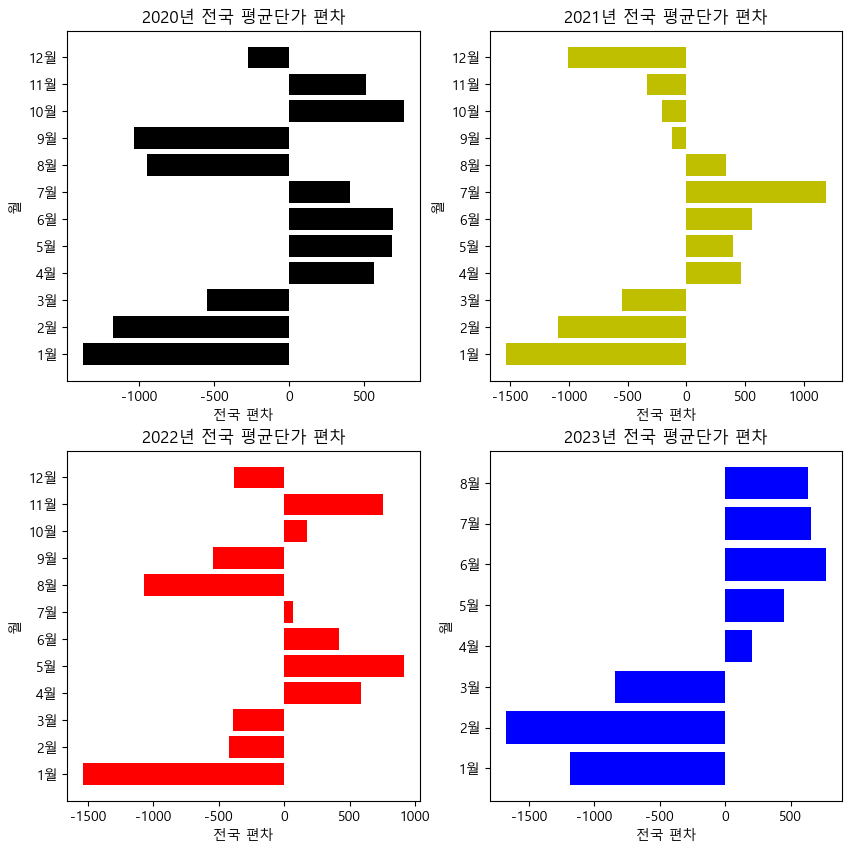

In [127]:
pltdata(months, total_all, "전국")

In [175]:
months[:9]

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [200]:

def areadata(month, data, crop, area1, area2):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area1], height=0.4, label=area1)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 두 지역의 %s 평균 단가 편차.png' % crop)
    plt.show()

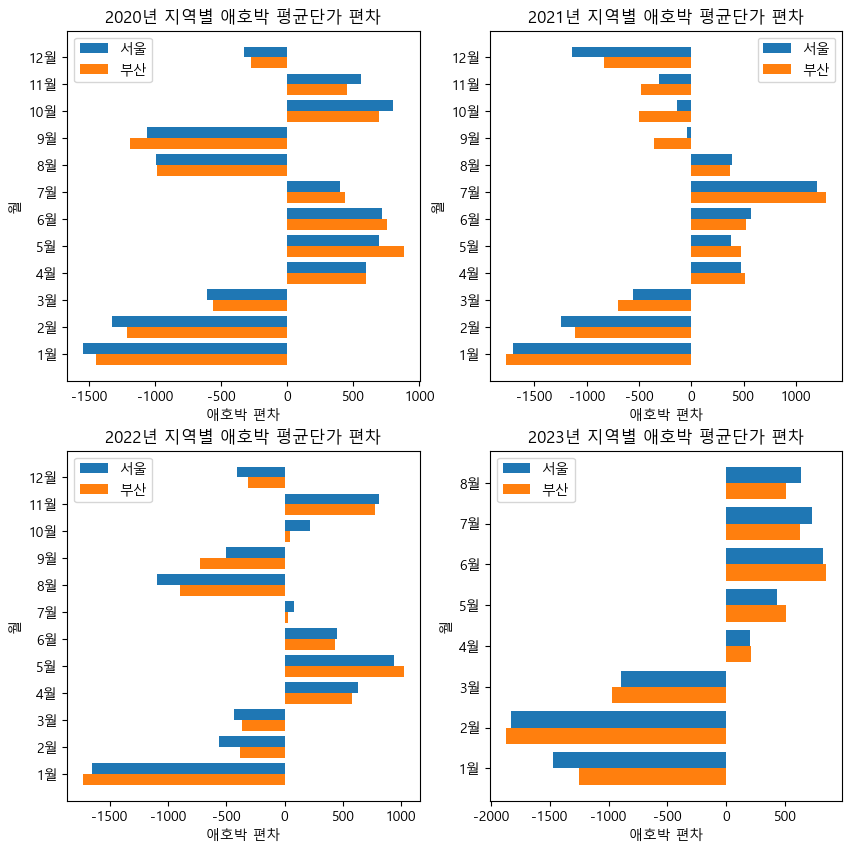

In [201]:
areadata(months, mean_all, "애호박", "서울", "부산")

In [202]:

def multiareadata(month, data, crop, area1, area2, area3, area4, area5):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month[:8], data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month[:8]-0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 지역별 %s 평균 단가 편차.png' % crop)
    plt.show()